# Full Text Screening
**Author:** Jack Galbraith-Edge

In [195]:
# Import libraries
from msc_code.scripts.notebook_setup import *

In [196]:
# Import results that were included from Title and Abstract Review.
import_path = os.path.join(PROC_DATA_DIR, "title_abstract_review", "title_abstract_review_include_final.csv") # Define import path.
title_abstract_included = pd.read_csv(import_path) # Import CSV to Pandas Dataframe.

# Take 'id', 'Publication Year', 'Authors', 'Title', 'Publication Title', 'Database' colums to create a new dataframe.
full_text_review_start_df = title_abstract_included[['id', 'Publication Year', 'Authors', 'Title', 'Publication Title', 'Database']]

# Add empty columns for use in review process
full_text_review_start_df['Exclude'] = None # Exclude (True/False)
full_text_review_start_df['Reason ID'] = None # Reason ID (Corresponds to Exclusion Criteria)
full_text_review_start_df['Paediatric'] = None # Paediatric Study (True/False)
full_text_review_start_df['Intention Reported'] = None # Intention Reported (True/False)
full_text_review_start_df['Deliberate Intention'] = None # Deliberate Intention (True/False)
full_text_review_start_df['Unclear'] = None # Unclear (True/False) for review with Supervisor
full_text_review_start_df['Accessed'] = None # Date resource accessed (YYYY-MM-DD)
full_text_review_start_df['Comments'] = None # Reviewed Comments

# Save the dataframe to a CSV file for full text screening.
full_text_review_start_df.to_csv("/".join([PROC_DATA_DIR, "full_text_screen", "full_text_screen_start.csv"]), index=False)

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_28912/1263456759.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_text_review_start_df['Exclude'] = None # Exclude (True/False)
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_28912/1263456759.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_text_review_start_df['Reason ID'] = None # Reason ID (Corresponds to Exclusion Criteria)
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_28912/1263456759.py:11: SettingWith

Full text articles were then reviewed in Zotero and tagged with 'exclude' if they met any exclusion criteria. 

Simultaneously, the exported CSV was annotated. 

In [197]:
# Troubleshoot errors in CSV encoding.

import_path = os.path.join(RAW_DATA_DIR, "full_text_screen", "full_text_screen_end_jge.csv")

# Identify the problematic line
with open(import_path, 'rb') as f:
    for i, line in enumerate(f):
        try:
            line.decode('utf-8')
        except UnicodeDecodeError as e:
            print(f"Error in line {i + 1}: {line}")
            print(f"Problematic byte: {line[e.start:e.end]}")
            break

In [198]:
# Reimport first author (JGE) screened results as pandas dataframe.
import_path = os.path.join(RAW_DATA_DIR, "full_text_screen", "full_text_screen_end_jge.csv")
jge_screened_df = pd.read_csv(import_path)

# Create dataframe of results not excluded in JGE full text screening.
jge_included = jge_screened_df[jge_screened_df['Exclude'] == False]

# Count number of results not excluded (included)
jge_include_count = len(jge_included)
print(f"Results screened and not excluded: {jge_include_count}")

# Create dataframe of results excluded in JGE full text screening. 
jge_excluded = jge_screened_df[jge_screened_df['Exclude'] == True]

# Count number of exclusions
jge_excluded_count = len(jge_excluded)

# Count number of unclear results for discussion with Supervisor
jge_unclear = jge_screened_df[jge_screened_df['Unclear'] == True]
jge_unclear_count = len(jge_unclear)
print(f"Unclear: {jge_unclear_count}")

# Create dataframe documenting exclusion reasoning
jge_excluded_reasoning = jge_excluded['Reason ID'].value_counts().rename('Count').reset_index()

# Map exclusion criteria category names to exclusion criteria Reason ID numerical values.
jge_excluded_reasoning['Reason'] = jge_excluded_reasoning['Reason ID'].map(exclusion_criteria)

# Print number of results excluded.
print(f"JGE excluded {jge_excluded_count} results during full text screening.")

# Create dataframe for items excluded without reason:
jge_exclude_no_reason = jge_excluded[(jge_excluded['Exclude'] == True ) & (jge_excluded['Reason ID'] == "NaN")]
jge_exclude_no_reason_count = len(jge_exclude_no_reason)
print(f"{jge_exclude_no_reason_count} records were excluded without a recorded reason.")
print(jge_exclude_no_reason if jge_exclude_no_reason_count > 0 else "All exclusions have reasons recorded.")


Results screened and not excluded: 105
Unclear: 1
JGE excluded 211 results during full text screening.
0 records were excluded without a recorded reason.
All exclusions have reasons recorded.


In [199]:
jge_unclear.to_csv("/".join([PROC_DATA_DIR, "full_text_screen", "jge_unclear.csv"]))

In [200]:
# Export papers not excluded to CSV
jge_included.to_csv("/".join([PROC_DATA_DIR, "full_text_screen", "jge_included.csv"]), index=False)

In [201]:
jge_no_recorded_intention = jge_screened_df[jge_screened_df['Intention Reported'] == False]
len(jge_no_recorded_intention)

96

## MS Review

In [202]:
# Create sample of 10% of papers
ms_review_start_df = create_results_sample(full_text_review_start_df, 0.1, 42) # '42' argument specificies random number to great sample from

ms_review_start_df = ms_review_start_df.sort_values(by=["Publication Year", "Title"])

ms_review_start_df.to_csv("/".join([RAW_DATA_DIR, "full_text_screen", "full_text_screen_start_ms.csv"]), index=False)

Given sample size: 316
Calculating desired sample size... 10% of 316 = 32
Creating Sample Dataframe


In [203]:
# Reimport MS reviewed papers
ms_reviewed = pd.read_excel("/".join([RAW_DATA_DIR, "full_text_screen", "full_text_screen_end_ms.xlsx"]))
jge_reviewed = jge_screened_df

# Set 1 values in Excel Exclude boolean True/False column to True, else False.
ms_reviewed["Exclude"] = ms_reviewed["Exclude"].eq(1) 
ms_reviewed["Unclear"] = ms_reviewed["Unclear"].eq(1)

## Author Agreement

In [204]:
ms_reviewed = ms_reviewed.rename(columns={
    "ms": "Study_ID",
    "Exclude": "Exclude_MS",
    "Reason ID": "Reason_ID_MS",
    "Unclear": "Unclear_MS",
    "Comments": "Comments_MS"
})

ms_reviewed = ms_reviewed[["Study_ID", "Exclude_MS", "Reason_ID_MS", "Unclear_MS", "Comments_MS"]]

In [205]:
jge_reviewed = jge_reviewed.rename(columns={
    "id": "Study_ID", 
    "Exclude": "Exclude_JGE",
    "Reason ID": "Reason_ID_JGE",
    "Unclear": "Unclear_JGE",
    "Comments": "Comments_JGE"
})

jge_reviewed = jge_reviewed[["Study_ID", "Exclude_JGE", "Reason_ID_JGE", "Unclear_JGE", "Comments_JGE"]]

In [206]:
jge_ms_reviewed = pd.merge(
    jge_reviewed,
    ms_reviewed,
    on="Study_ID",
    how="right",
).set_index("Study_ID")

In [207]:
jge_ms_reviewed[jge_ms_reviewed['Exclude_JGE'].isna()]

,Exclude_JGE,Reason_ID_JGE,Unclear_JGE,Comments_JGE,Exclude_MS,Reason_ID_MS,Unclear_MS,Comments_MS
Study_ID,,,,,,,,


In [208]:
jge_ms_reviewed['Exclude_MS'].value_counts()

Exclude_MS
True     23
False     7
Name: count, dtype: int64

In [209]:
jge_ms_reviewed['Exclude_JGE'].value_counts()

Exclude_JGE
True     24
False     6
Name: count, dtype: int64

In [210]:
# Import Cohen's Kappa from scikit-learn
from sklearn.metrics import cohen_kappa_score

y1 = jge_ms_reviewed["Exclude_JGE"]
y2 = jge_ms_reviewed["Exclude_MS"]

cohen_kappa_score(y1, y2)

0.7058823529411764

## GC Review

In [211]:
# Create table of disagreements
jge_ms_disagree = jge_ms_reviewed[jge_ms_reviewed["Exclude_JGE"] != jge_ms_reviewed["Exclude_MS"]]

jge_ms_disagree["Exclude_GC"] = np.nan
jge_ms_disagree["Reason_ID_GC"] = np.nan
jge_ms_disagree["Comments_GC"] = np.nan

# Export to CSV for third author review
jge_ms_disagree.to_csv("/".join([PROC_DATA_DIR, "full_text_screen", "jge_ms_disagree.csv"]))

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_28912/865447347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jge_ms_disagree["Exclude_GC"] = np.nan
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_28912/865447347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jge_ms_disagree["Reason_ID_GC"] = np.nan
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_28912/865447347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [212]:
jge_reviewed = jge_reviewed.rename(columns={
    "id": "Study_ID"
})

In [213]:
# Import GC reviewed disagreements
gc_reviewed = pd.read_csv("/".join([RAW_DATA_DIR, "full_text_screen", "gc_reviewed.csv"]))
gc_reviewed = gc_reviewed[["Study_ID", "Exclude_GC", "Reason_ID_GC", "Comments_GC"]]

## Final Inclusion

In [214]:
# Create final review dataframe showing all author decisions, comments and reasoning.

# Merge JGE and MS reviews
all_reviewed = pd.merge(
    jge_reviewed,
    ms_reviewed,
    how='left',
    on='Study_ID'
)

# Merge GC review information with JGE and MS reviews
all_reviewed = pd.merge(
    all_reviewed,
    gc_reviewed,
    how='left',
    on='Study_ID'
)

# Calculate Final Exclusion status
all_reviewed['Exclude_FINAL'] = all_reviewed.apply(
    lambda row: row['Exclude_JGE']
    if pd.isna(row['Exclude_MS'])  # If MS is NaN, take JGE's decision
    else (row['Exclude_JGE']
          if row['Exclude_JGE'] == row['Exclude_MS']  # If JGE and MS agree
          else row['Exclude_GC']),  # If JGE and MS disagree, take GC's decision
    axis=1
)

def resolve_reason(row):
    if not row['Exclude_FINAL']:
        return None  # Only give a reason if excluded
    
    # Case 1: MS is missing → JGE's decision was used
    if pd.isna(row['Exclude_MS']):
        return row['Reason_ID_JGE']
    
    # Case 2: JGE and MS agree → JGE's decision was used
    if row['Exclude_JGE'] == row['Exclude_MS']:
        return row['Reason_ID_JGE']
    
    # Case 3: Disagreement → GC's decision was used
    return row['Reason_ID_GC']

all_reviewed['Reason_ID_FINAL'] = all_reviewed.apply(resolve_reason, axis=1)

In [215]:
# Set Index of all_reviewed
all_reviewed.index = all_reviewed['Study_ID']

## Final Exclusion Reasoning

In [216]:
all_reviewed['Exclude_FINAL'].value_counts()

Exclude_FINAL
True     211
False    105
Name: count, dtype: int64

In [217]:
# Create dataframe of excluded papers
excluded_final = all_reviewed[all_reviewed['Exclude_FINAL'] != False]

In [218]:
# Create dataframe of exclusion reasoning
excluded_final_reason = excluded_final['Reason_ID_FINAL'].reset_index()
excluded_final_reason.index = excluded_final_reason['Study_ID']

# Rename column
excluded_final_reason = excluded_final_reason.rename(columns={
    'Reason_ID_FINAL': 'Reason_ID'
})

excluded_final_reason["Reason_Text"] = excluded_final_reason['Reason_ID'].map(exclusion_criteria_short)

In [219]:
excluded_final_reason_counts = excluded_final_reason['Reason_Text'].value_counts()
excluded_final_reason_counts = excluded_final_reason_counts.reset_index()
excluded_final_reason_counts.columns = ['Reason_Text', 'Count']

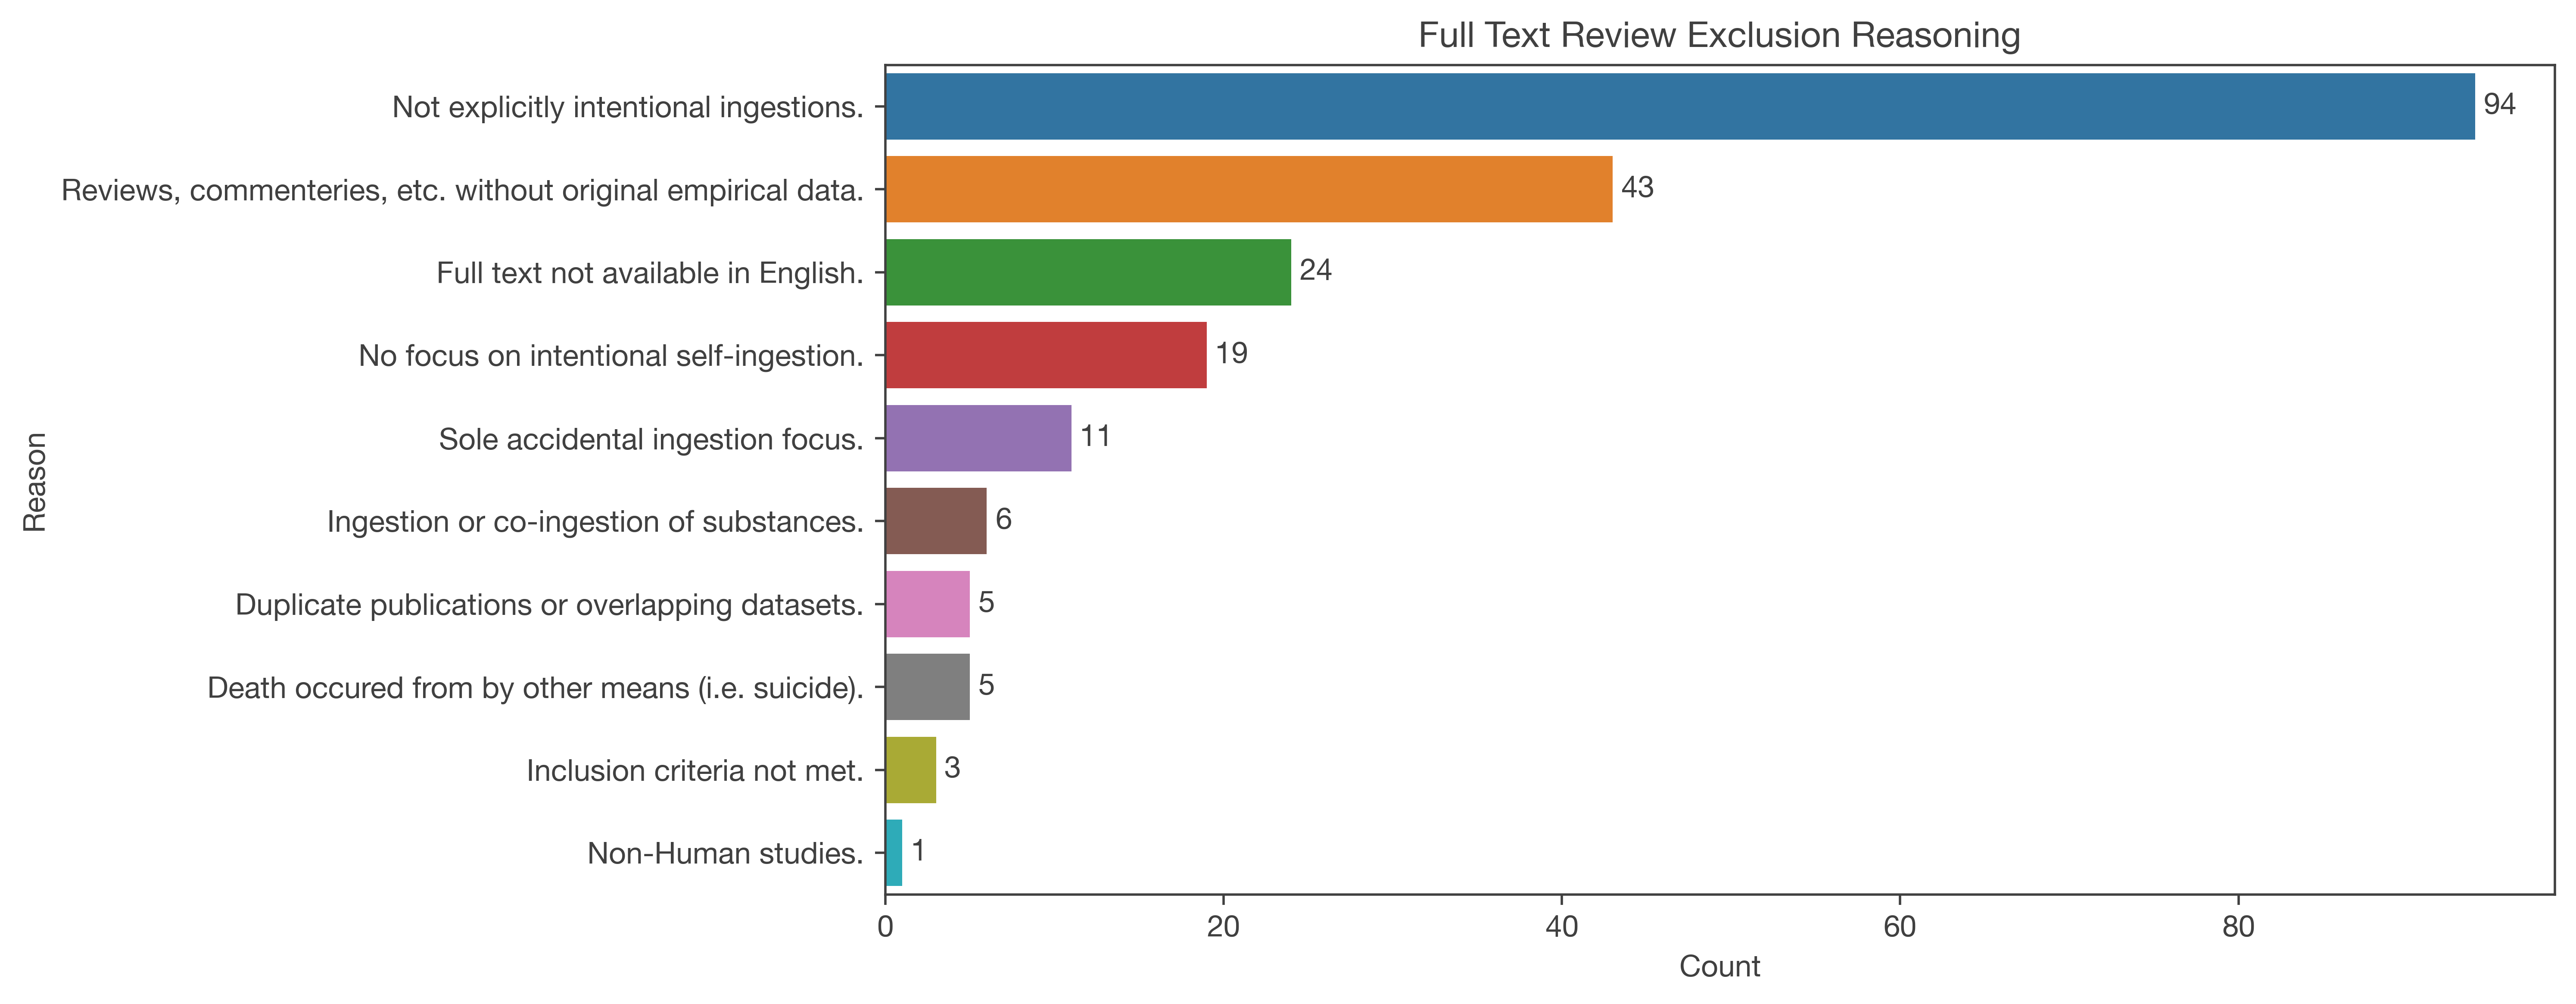

In [220]:
plt.figure(figsize=(10, 5))

excluded_final_reason_plot = sns.barplot(
    data=excluded_final_reason_counts,
    x='Count',
    y='Reason_Text'
)
excluded_final_reason_plot.set(
    title="Full Text Review Exclusion Reasoning",
    ylabel="Reason",
    xlabel="Count")

for i, (count, reason) in enumerate(zip(excluded_final_reason_counts['Count'], excluded_final_reason_counts['Reason_Text'])):
    excluded_final_reason_plot.annotate(
        text=f"{count}",
        xy=(count + 0.5, i),  # x = count + small offset, y = position in list
        va='center'
    )
plt.savefig("/".join([FIG_DIR, "ft_exclusion_reasoning_plot.png"]), dpi=300, bbox_inches='tight')
plt.show()

## Included Papers (not excluded)

In [221]:
# Create dataframe of excluded papers
included_final = all_reviewed[all_reviewed['Exclude_FINAL'] == False]

# Create dataframe of Author Comments
author_comments = all_reviewed[['Study_ID', 'Comments_JGE', 'Comments_MS', 'Comments_GC']]

# Create database of Author Exclusion Decisions
author_decisions = all_reviewed[['Study_ID', 'Exclude_JGE', 'Exclude_MS', 'Exclude_GC']]

# Create database of author reasoning
author_reasoning = all_reviewed[['Study_ID', 'Reason_ID_JGE', 'Reason_ID_MS', 'Reason_ID_GC']]

In [222]:
all_reviewed

,Study_ID,Exclude_JGE,Reason_ID_JGE,Unclear_JGE,Comments_JGE,Exclude_MS,Reason_ID_MS,Unclear_MS,Comments_MS,Exclude_GC,Reason_ID_GC,Comments_GC,Exclude_FINAL,Reason_ID_FINAL
Study_ID,,,,,,,,,,,,,,
3,3,False,NaN,NaN,Record of first gastrotomy for intention inges...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,4,True,1.0,NaN,"Pay wall, unable to access via QMUL or Sci-Hub.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.0
7,7,True,9.0,NaN,Case series in 'Oesophagus' Section. Intention...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,9.0
15,15,True,9.0,NaN,Case series. All children. All appear to be co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,9.0
21,21,True,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,485,False,NaN,NaN,Case report. 45M intentional ingestion of butt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
486,486,True,3.0,NaN,Case series. All accidental cases.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,3.0
487,487,True,9.0,NaN,Case series. Age < 21 inclusion. But all cases...,True,2.0,False,NaN,NaN,NaN,NaN,True,9.0


## Export

In [223]:
# Define export path
export_path = os.path.join(PROC_DATA_DIR, "full_text_screen")

all_reviewed.to_csv('/'.join([export_path, "full_text_screen_end_final.csv"]), index=False)

# Export excluded to CSV
excluded_final.to_csv('/'.join([export_path, "full_text_screen_excluded_final.csv"]), index=False)

# Export inluded papers to CSV
included_final.to_csv('/'.join([export_path, "full_text_screen_included_final.csv"]), index=False)

# Export author comments to CSV
author_comments.to_csv('/'.join([export_path, "full_text_screen_author_comments.csv"]), index=False)

# Export author reasoning to CSV
author_reasoning.to_csv('/'.join([export_path, "full_text_screen_author_reasoning"]), index=False)
